# Quins ciutat i barris presenten un potencial d'optimització més gran considerant les ressenyes, la puntuació de la zona i la disponibilitat mínima/màxima de nits?

### Número mínimo y máximo de noches: 
    - El número mínimo de noches viene dado por la necesidad de evitar días sin ocupación, en este caso se debe tener un balance entre no tener días sin ocupación y evitar que los huespedes puedan contratar varias noches seguidas, un buen número de noches mínimas es de 2 (corresponde a las noches de fin de semana)
    - El número máximo de noches nos lo marca la normativa estatal, los alojamientos turísticos no pueden ser alquilados por un periodo mayor a 30 días, si se alquilase por más de 31 días el regimen pasaría a ser el de alojamiento de temporada.

### Puntuación de reseñas 
    - Se establece el valor optimo de las reseñas en 80 puntos tal como se establece en el estudio: https://www.cimec.es/grados-de-satisfaccion/

### Puntuación de zona
    - La puntuación óptima de la zona se establecerá con el mismo criterio que en las reseñas.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("tourist_accommodation_10112025_clean.csv")

In [7]:
data

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,is_valid,ocupacion_mes
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2,1.0,...,10.0,10.0,10.0,0,0.406109,Spain,Málaga,2018-07-31,True,23
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,Cármenes,Latina,Private room,1,1,1.0,...,10.0,8.0,9.0,0,0.244444,Spain,Madrid,2020-01-10,True,30
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2.0,...,10.0,10.0,10.0,1,0.836473,Spain,Sevilla,2019-07-29,True,4
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,L'Antiga Esquerra De L'Eixample,Eixample,Private room,2,2,1.0,...,10.0,10.0,9.0,1,4.273171,Spain,Barcelona,2020-01-10,True,21
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1,2.0,...,10.0,10.0,10.0,0,0.207294,Spain,Girona,2019-02-19,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9401,47710189,Beautiful house in the centre in Santa Cristin...,Beautiful house in the center of Santa Cristin...,263841355,Santa Cristina D'Aro,NaN,Entire home/apt,8,2,4.0,...,10.0,10.0,9.0,1,0.070061,Spain,Girona,2021-01-31,True,30
9402,47752964,Costa Brava - Palafrugell - playa y monta�a,Piso con acceso directo a piscina. Lugar muy t...,282214688,Palafrugell,NaN,Entire home/apt,7,2,3.0,...,10.0,10.0,9.0,0,0.070061,Spain,Girona,2021-02-27,True,1
9403,47792016,MODERN AND BRIGHT NEW FLAT IN THE CENTER OF PA...,Modern and new apartment in the old town of Pa...,263841355,Palamós,NaN,Entire home/apt,6,1,3.0,...,10.0,10.0,9.0,1,0.070061,Spain,Girona,2021-01-31,True,30
9404,47884481,MIT House Olavide III in Madrid,The apartment is in a characteristic building ...,377605855,Trafalgar,Chamberí,Entire home/apt,4,1,1.0,...,10.0,10.0,9.0,0,0.181622,Spain,Madrid,2021-02-09,True,14


In [8]:
data.columns

Index(['apartment_id', 'name', 'description', 'host_id', 'neighbourhood_name',
       'neighbourhood_district', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_instant_bookable', 'reviews_per_month',
       'country', 'city', 'insert_date', 'is_valid', 'ocupacion_mes'],
      dtype='object')

### Optimización en base a los datos medios de barrios

In [10]:
neighbour_data = data[["neighbourhood_name","review_scores_location","review_scores_rating",
                       "minimum_nights","maximum_nights","city"]].groupby(["city", "neighbourhood_name"]).agg("mean")

In [11]:
neighbour_data

review_scores_location  \
city      neighbourhood_name                                                     
Barcelona Can Baró                                                    8.714286   
          Can Peguera                                                10.000000   
          Ciutat Meridiana                                            9.000000   
          Diagonal Mar I El Front Marítim Del Poblenou                9.750000   
          El Baix Guinardó                                            9.615385   
...                                                                        ...   
Valencia  Tormos                                                      9.500000   
          Torrefiel                                                   8.750000   
          Tres Forques                                                9.250000   
          Trinitat                                                   10.000000   
          Vara De Quart                                               9.500000   

                                                        review_scores_rating  \
city      neighbourhood_name                                                   
Barcelona Can Baró                                                 93.000000   
          Can Peguera                                              99.000000   
          Ciutat Meridiana                                         96.000000   
          Diagonal Mar I El Front Marítim Del Poblenou             95.083333   
          El Baix Guinardó                                         92.076923   
...                                                                      ...   
Valencia  Tormos                                                   92.500000   
          Torrefiel                                                93.500000   
          Tres Forques                                             93.500000   
          Trinitat                                                 94.000000   
          Vara De Quart                                            92.500000   

                                                        minimum_nights  \
city      neighbourhood_name                                             
Barcelona Can Baró                                            6.428571   
          Can Peguera                                         1.000000   
          Ciutat Meridiana                                    4.000000   
          Diagonal Mar I El Front Marítim Del Poblenou        4.541667   
          El Baix Guinardó                                    6.846154   
...                                                                ...   
Valencia  Tormos                                              1.500000   
          Torrefiel                                           2.500000   
          Tres Forques                                        1.750000   
          Trinitat                                            1.000000   
          Vara De Quart                                       1.500000   

                                                        maximum_nights  
city      neighbourhood_name                                            
Barcelona Can Baró                                          662.857143  
          Can Peguera                                      1125.000000  
          Ciutat Meridiana                                 1125.000000  
          Diagonal Mar I El Front Marítim Del Poblenou      746.750000  
          El Baix Guinardó                                  702.000000  
...                                                                ...  
Valencia  Tormos                                             22.500000  
          Torrefiel                                         299.000000  
          Tres Forques                                      572.500000  
          Trinitat                                         1125.000000  
          Vara De Quart                                    1125.000000  

[520 rows x 4 columns]

In [12]:
neighbour_data[neighbour_data["review_scores_location"]<8]

review_scores_location  review_scores_rating  \
city    neighbourhood_name                                                 
Girona  Osor                                   7.0                  73.0   
        Vilajuïga                              6.0                  70.0   
Sevilla An Roque                               7.8                  75.6   
        La Bachillera                          7.0                  90.0   

                            minimum_nights  maximum_nights  
city    neighbourhood_name                                  
Girona  Osor                           1.0            31.0  
        Vilajuïga                      1.0          1125.0  
Sevilla An Roque                       2.6          1125.0  
        La Bachillera                  2.0             7.0

In [13]:
neighbour_data[neighbour_data["review_scores_rating"]<80]

review_scores_location  \
city     neighbourhood_name                                                           
Girona   Ger                                                                   8.00   
         Osor                                                                  7.00   
         Vilajuïga                                                             6.00   
Madrid   Mirasierra                                                           10.00   
         Palomeras Bajas                                                       8.75   
Sevilla  An Roque                                                              7.80   
         Palacio Congresos Urbadiez Entrepuentes Jardine...                    9.00   
         Prado Parque Mar A Luisa                                              8.00   
Valencia El Calvari                                                            8.00   
         La Vega Baixa                                                         9.00   

                                                             review_scores_rating  \
city     neighbourhood_name                                                         
Girona   Ger                                                               76.500   
         Osor                                                              73.000   
         Vilajuïga                                                         70.000   
Madrid   Mirasierra                                                        75.000   
         Palomeras Bajas                                                   78.125   
Sevilla  An Roque                                                          75.600   
         Palacio Congresos Urbadiez Entrepuentes Jardine...                79.500   
         Prado Parque Mar A Luisa                                          60.000   
Valencia El Calvari                                                        75.000   
         La Vega Baixa                                                     73.000   

                                                             minimum_nights  \
city     neighbourhood_name                                                   
Girona   Ger                                                            2.0   
         Osor                                                           1.0   
         Vilajuïga                                                      1.0   
Madrid   Mirasierra                                                     3.0   
         Palomeras Bajas                                                6.0   
Sevilla  An Roque                                                       2.6   
         Palacio Congresos Urbadiez Entrepuentes Jardine...             2.0   
         Prado Parque Mar A Luisa                                       2.0   
Valencia El Calvari                                                     3.0   
         La Vega Baixa                                                  2.0   

                                                             maximum_nights  
city     neighbourhood_name                                                  
Girona   Ger                                                         576.50  
         Osor                                                         31.00  
         Vilajuïga                                                  1125.00  
Madrid   Mirasierra                                                  564.50  
         Palomeras Bajas                                             752.75  
Sevilla  An Roque                                                   1125.00  
         Palacio Congresos Urbadiez Entrepuentes Jardine...           30.00  
         Prado Parque Mar A Luisa                                   1125.00  
Valencia El Calvari                                                 1125.00  
         La Vega Baixa                                              1125.00

In [14]:
neighbour_data[(neighbour_data["minimum_nights"]<2)|(neighbour_data["minimum_nights"]>3)]

review_scores_location  \
city      neighbourhood_name                                                     
Barcelona Can Baró                                                    8.714286   
          Can Peguera                                                10.000000   
          Ciutat Meridiana                                            9.000000   
          Diagonal Mar I El Front Marítim Del Poblenou                9.750000   
          El Baix Guinardó                                            9.615385   
...                                                                        ...   
Valencia  Sant Pau                                                   10.000000   
          Tormos                                                      9.500000   
          Tres Forques                                                9.250000   
          Trinitat                                                   10.000000   
          Vara De Quart                                               9.500000   

                                                        review_scores_rating  \
city      neighbourhood_name                                                   
Barcelona Can Baró                                                 93.000000   
          Can Peguera                                              99.000000   
          Ciutat Meridiana                                         96.000000   
          Diagonal Mar I El Front Marítim Del Poblenou             95.083333   
          El Baix Guinardó                                         92.076923   
...                                                                      ...   
Valencia  Sant Pau                                                 98.000000   
          Tormos                                                   92.500000   
          Tres Forques                                             93.500000   
          Trinitat                                                 94.000000   
          Vara De Quart                                            92.500000   

                                                        minimum_nights  \
city      neighbourhood_name                                             
Barcelona Can Baró                                            6.428571   
          Can Peguera                                         1.000000   
          Ciutat Meridiana                                    4.000000   
          Diagonal Mar I El Front Marítim Del Poblenou        4.541667   
          El Baix Guinardó                                    6.846154   
...                                                                ...   
Valencia  Sant Pau                                            7.000000   
          Tormos                                              1.500000   
          Tres Forques                                        1.750000   
          Trinitat                                            1.000000   
          Vara De Quart                                       1.500000   

                                                        maximum_nights  
city      neighbourhood_name                                            
Barcelona Can Baró                                          662.857143  
          Can Peguera                                      1125.000000  
          Ciutat Meridiana                                 1125.000000  
          Diagonal Mar I El Front Marítim Del Poblenou      746.750000  
          El Baix Guinardó                                  702.000000  
...                                                                ...  
Valencia  Sant Pau                                           90.000000  
          Tormos                                             22.500000  
          Tres Forques                                      572.500000  
          Trinitat                                         1125.000000  
          Vara De Quart                                    1125.000000  

[352 rows x 4 columns]

In [15]:
neighbour_data[(neighbour_data["maximum_nights"]>30)|(neighbour_data["maximum_nights"]<3)]

review_scores_location  \
city      neighbourhood_name                                                     
Barcelona Can Baró                                                    8.714286   
          Can Peguera                                                10.000000   
          Ciutat Meridiana                                            9.000000   
          Diagonal Mar I El Front Marítim Del Poblenou                9.750000   
          El Baix Guinardó                                            9.615385   
...                                                                        ...   
Valencia  Soternes                                                    8.500000   
          Torrefiel                                                   8.750000   
          Tres Forques                                                9.250000   
          Trinitat                                                   10.000000   
          Vara De Quart                                               9.500000   

                                                        review_scores_rating  \
city      neighbourhood_name                                                   
Barcelona Can Baró                                                 93.000000   
          Can Peguera                                              99.000000   
          Ciutat Meridiana                                         96.000000   
          Diagonal Mar I El Front Marítim Del Poblenou             95.083333   
          El Baix Guinardó                                         92.076923   
...                                                                      ...   
Valencia  Soternes                                                 91.000000   
          Torrefiel                                                93.500000   
          Tres Forques                                             93.500000   
          Trinitat                                                 94.000000   
          Vara De Quart                                            92.500000   

                                                        minimum_nights  \
city      neighbourhood_name                                             
Barcelona Can Baró                                            6.428571   
          Can Peguera                                         1.000000   
          Ciutat Meridiana                                    4.000000   
          Diagonal Mar I El Front Marítim Del Poblenou        4.541667   
          El Baix Guinardó                                    6.846154   
...                                                                ...   
Valencia  Soternes                                            2.000000   
          Torrefiel                                           2.500000   
          Tres Forques                                        1.750000   
          Trinitat                                            1.000000   
          Vara De Quart                                       1.500000   

                                                        maximum_nights  
city      neighbourhood_name                                            
Barcelona Can Baró                                          662.857143  
          Can Peguera                                      1125.000000  
          Ciutat Meridiana                                 1125.000000  
          Diagonal Mar I El Front Marítim Del Poblenou      746.750000  
          El Baix Guinardó                                  702.000000  
...                                                                ...  
Valencia  Soternes                                         1125.000000  
          Torrefiel                                         299.000000  
          Tres Forques                                      572.500000  
          Trinitat                                         1125.000000  
          Vara De Quart                                    1125.000000  

[481 rows x 4 columns]

In [16]:
neighbour_data[(neighbour_data["review_scores_location"]<8)&(neighbour_data["review_scores_rating"]<80)
                & ((neighbour_data["minimum_nights"]<2)|(neighbour_data["minimum_nights"]>3)) & 
                ((neighbour_data["maximum_nights"]>30)|(neighbour_data["maximum_nights"]<3))]

review_scores_location  review_scores_rating  \
city   neighbourhood_name                                                 
Girona Osor                                   7.0                  73.0   
       Vilajuïga                              6.0                  70.0   

                           minimum_nights  maximum_nights  
city   neighbourhood_name                                  
Girona Osor                           1.0            31.0  
       Vilajuïga                      1.0          1125.0

### Optimización en base a alojamientos por barrios

In [18]:
optimize_data = data[["neighbourhood_name","review_scores_location","review_scores_rating","minimum_nights","maximum_nights","city"]][(data["review_scores_location"]<8)
&(data["review_scores_rating"]<80)&((data["minimum_nights"]<2)|(data["minimum_nights"]>3))&((data["maximum_nights"]>30)|(data["maximum_nights"]<3))]

In [19]:
optimize_data

,neighbourhood_name,review_scores_location,review_scores_rating,minimum_nights,maximum_nights,city
823,Castelló D'Empúries,7.0,70.0,7,1125,Girona
1554,El Barri Gòtic,6.0,60.0,1,1125,Barcelona
1669,San Diego,5.0,40.0,30,1125,Madrid
1702,Calonge,7.0,75.0,7,1125,Girona
2716,Osor,7.0,73.0,1,31,Girona
2900,El Raval,7.0,77.0,32,1120,Barcelona
3903,L'Escala,6.0,60.0,1,1125,Girona
4010,El Carmel,7.0,76.0,1,1125,Barcelona
4064,Valverde,7.0,73.0,1,1125,Madrid
4098,El Besòs I El Maresme,4.0,60.0,4,32,Barcelona


In [20]:
location_under_8 = data[data["review_scores_location"]<8] 
group_location_under_8 = location_under_8[["apartment_id","neighbourhood_name",
                                           "review_scores_location","city"]].groupby(["city", "neighbourhood_name"]).agg(num_apart = ("apartment_id", "count"))
group_location_under_8

num_apart
city      neighbourhood_name                   
Barcelona El Barri Gòtic                      1
          El Besòs I El Maresme               6
          El Camp De L'Arpa Del Clot          1
          El Carmel                           2
          El Coll                             2
...                                         ...
Málaga    Cruz De Humilladero                 1
Sevilla   An Roque                            1
          La Bachillera                       1
Valencia  Els Orriols                         1
          Sant Francesc                       1

[74 rows x 1 columns]

In [21]:
rating_under_80 = data[data["review_scores_rating"]<80] 
group_rating_under_80 = rating_under_80[["apartment_id","neighbourhood_name",
                                         "review_scores_location","city"]].groupby(["city", "neighbourhood_name"]).agg(num_apart = ("apartment_id", "count"))
group_rating_under_80

num_apart
city      neighbourhood_name                           
Barcelona El Baix Guinardó                            1
          El Barri Gòtic                             13
          El Besòs I El Maresme                       3
          El Bon Pastor                               1
          El Camp D'En Grassot I Gràcia Nova          1
...                                                 ...
Valencia  La Vega Baixa                               1
          Na Rovella                                  1
          Nou Moles                                   1
          Russafa                                     2
          Sant Francesc                               1

[144 rows x 1 columns]

In [22]:
minimum_nights = data[(data["minimum_nights"]<2)|(data["minimum_nights"]>3)]
group_minimum_nights = minimum_nights[["apartment_id","neighbourhood_name",
                                       "review_scores_location","city"]].groupby(["city", "neighbourhood_name"]).agg(num_apart = ("apartment_id", "count")) 
group_minimum_nights

num_apart
city      neighbourhood_name                                     
Barcelona Can Baró                                              3
          Can Peguera                                           1
          Ciutat Meridiana                                      1
          Diagonal Mar I El Front Marítim Del Poblenou         11
          El Baix Guinardó                                      7
...                                                           ...
Valencia  Tormos                                                1
          Torrefiel                                             2
          Tres Forques                                          4
          Trinitat                                              1
          Vara De Quart                                         1

[444 rows x 1 columns]

In [23]:
maximum_nights = data[(data["maximum_nights"]>30)|(data["maximum_nights"]<3)]
group_maximum_nights = maximum_nights[["apartment_id","neighbourhood_name",
                                       "review_scores_location","city"]].groupby(["city", "neighbourhood_name"]).agg(num_apart = ("apartment_id", "count")) 
group_maximum_nights

num_apart
city      neighbourhood_name                                     
Barcelona Can Baró                                              6
          Can Peguera                                           1
          Ciutat Meridiana                                      1
          Diagonal Mar I El Front Marítim Del Poblenou         20
          El Baix Guinardó                                      9
...                                                           ...
Valencia  Soternes                                              2
          Torrefiel                                             2
          Tres Forques                                          2
          Trinitat                                              1
          Vara De Quart                                         2

[483 rows x 1 columns]

In [24]:
df = data[(data["review_scores_location"]<8)&(data["review_scores_rating"]<80)&((data["minimum_nights"]<2)|(data["minimum_nights"]>3))&((data["maximum_nights"]>30)|(data["maximum_nights"]<3))].groupby(["city", "neighbourhood_name"]).agg(num_apart = ("apartment_id", "count"))

In [25]:
df


num_apart
city      neighbourhood_name                       
Barcelona El Barri Gòtic                          1
          El Besòs I El Maresme                   1
          El Carmel                               2
          El Raval                                3
          La Dreta De L'Eixample                  1
          La Nova Esquerra De L'Eixample          1
          La Sagrada Família                      2
Girona    Calonge                                 1
          Castell-Platja D'Aro                    1
          Castelló D'Empúries                     1
          L'Escala                                2
          Osor                                    1
          Roses                                   1
          Vilajuïga                               1
Madrid    Palomeras Bajas                         1
          San Diego                               1
          Valverde                                1
Mallorca  Palma De Mallorca                       1
          Sant Llorenç Des Cardassar              1
Sevilla   An Roque                                1
Valencia  Els Orriols                             1

### Visualizaciones

#### Barrios con apartamentos por debajo de 8 en reviews de localización 

<Axes: title={'center': 'Apartamentos con nota por debajo de 8 por barrio'}, xlabel='Cantidad de apartamentos', ylabel='Barrio'>

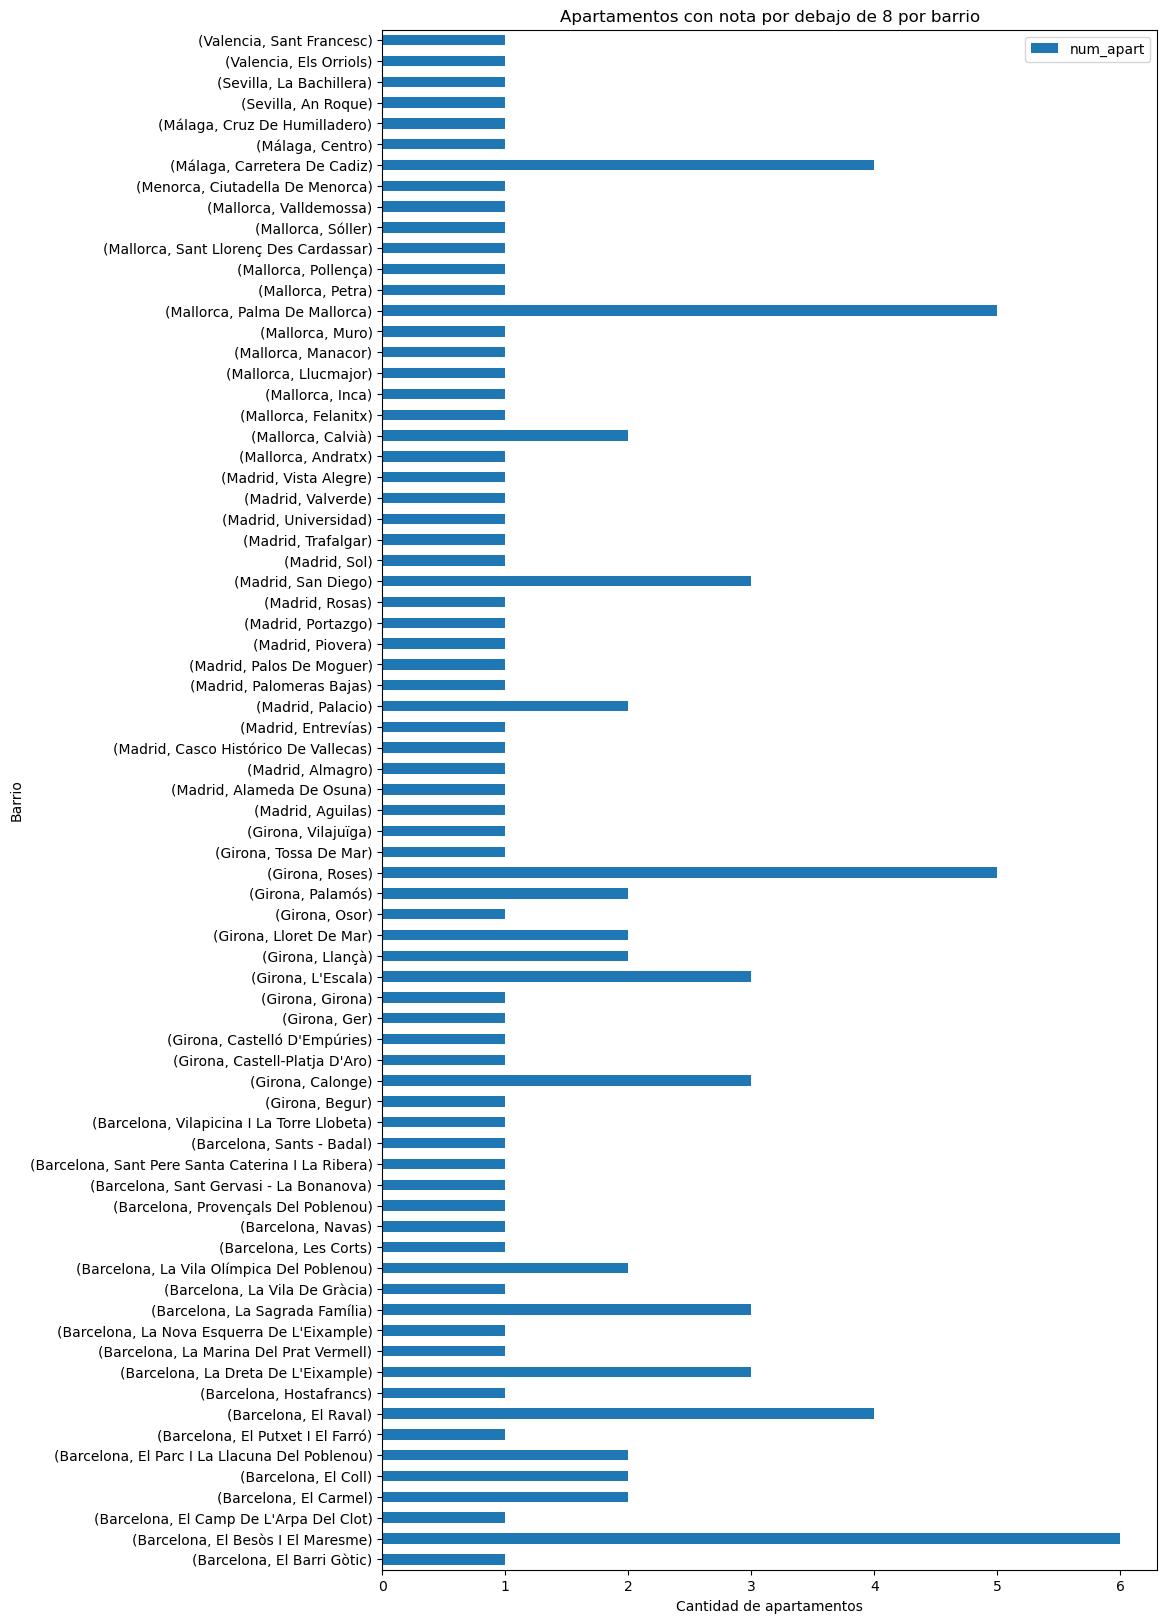

In [28]:
group_location_under_8.plot(kind='barh', title='Apartamentos con nota por debajo de 8 por barrio',
               ylabel='Barrio', xlabel='Cantidad de apartamentos', figsize=(10, 20))

#### Barrios con apartamentos por debajo de 80 en scores rating

<Axes: title={'center': 'Apartamentos con nota por debajo de 80 por barrio'}, xlabel='Cantidad de apartamentos', ylabel='Barrio'>

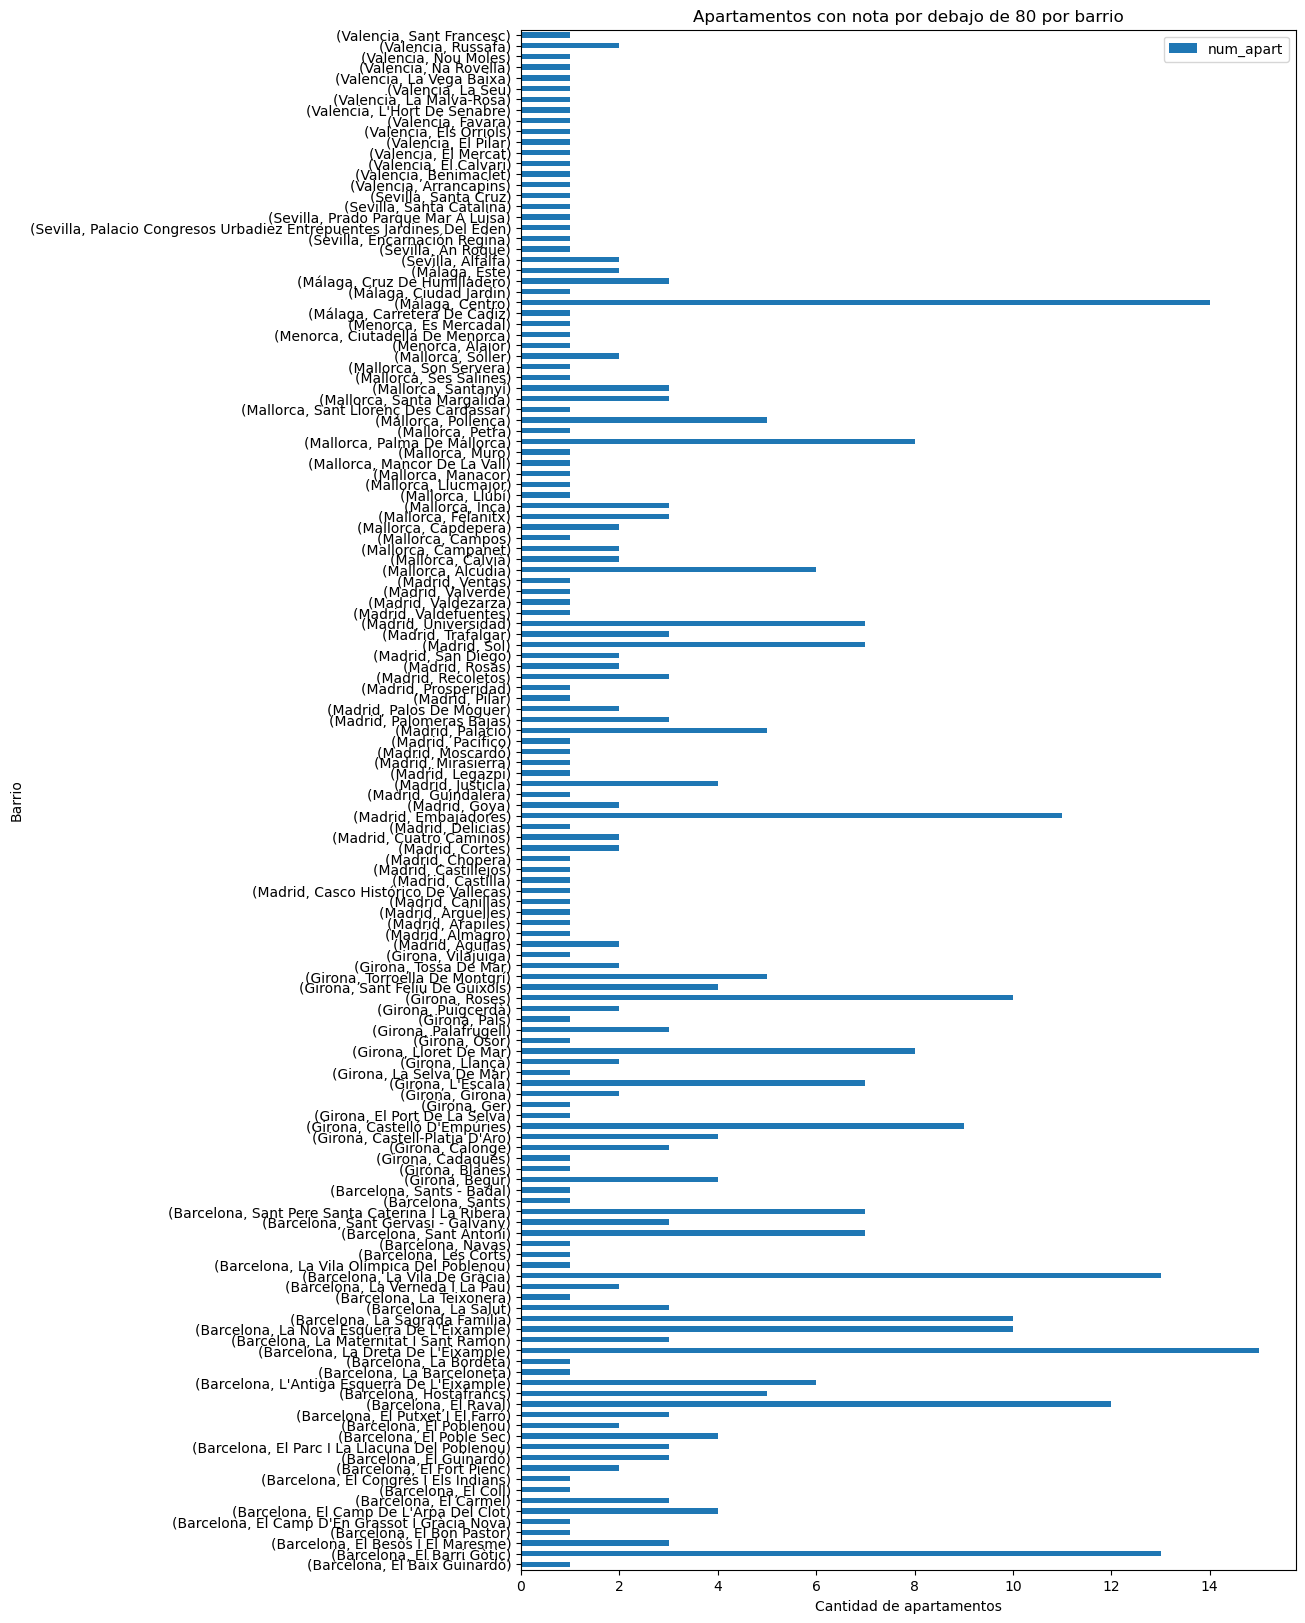

In [30]:
group_rating_under_80.plot(kind='barh', title='Apartamentos con nota por debajo de 80 por barrio',
               ylabel='Barrio', xlabel='Cantidad de apartamentos', figsize=(10, 20))

#### Barrios con apartamentos con minimo de noches por debajo de 2 y por encima de 3

<Axes: title={'center': 'Apartamentos con minimo de noches por debajo de 2 y por encima de 3 por barrio'}, xlabel='Cantidad de apartamentos', ylabel='Barrio'>

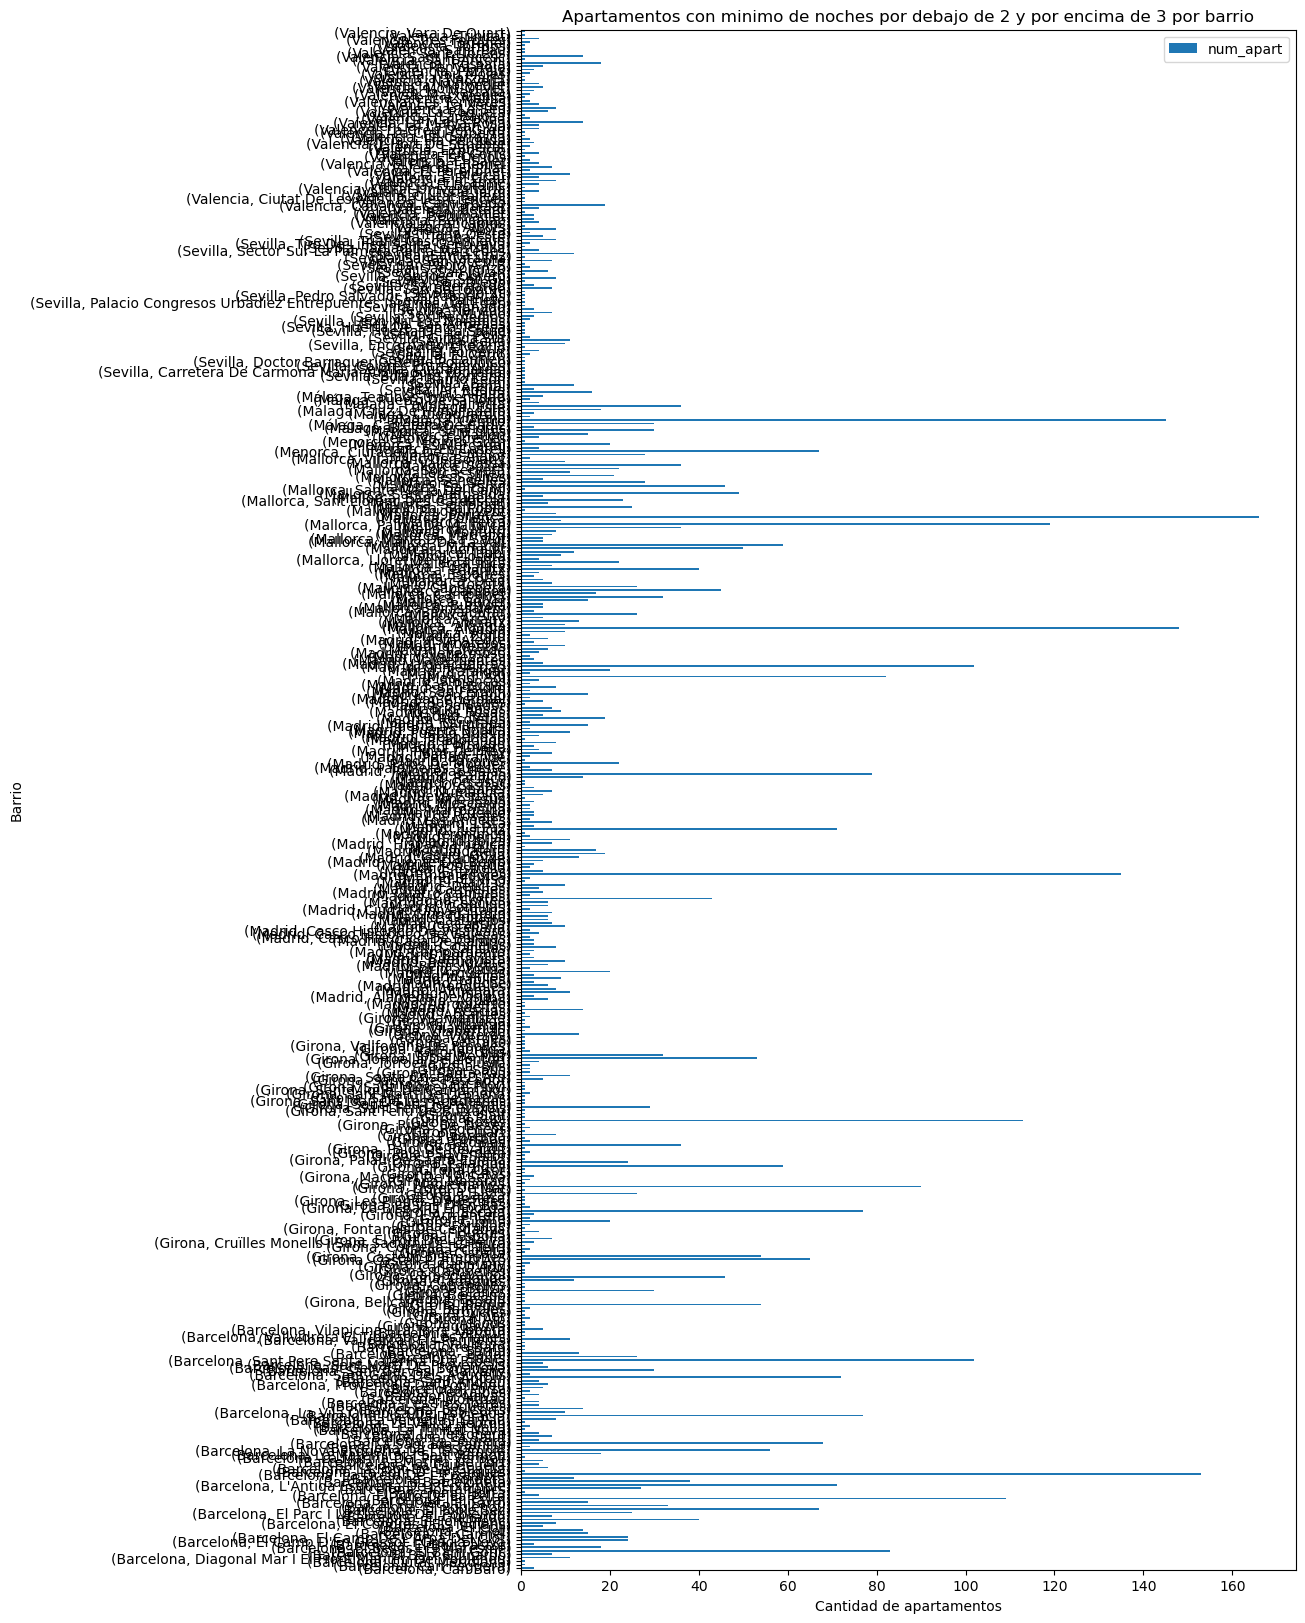

In [32]:
group_minimum_nights.plot(kind='barh', title='Apartamentos con minimo de noches por debajo de 2 y por encima de 3 por barrio',
               ylabel='Barrio', xlabel='Cantidad de apartamentos', figsize=(10, 20))

#### Barrios con apartamentos con máximo de noches por encima de 30 y por debajo de 3

<Axes: title={'center': 'Apartamentos con maximo de noches por encima de 30 y por debajo de 3 por barrio'}, xlabel='Cantidad de apartamentos', ylabel='Barrio'>

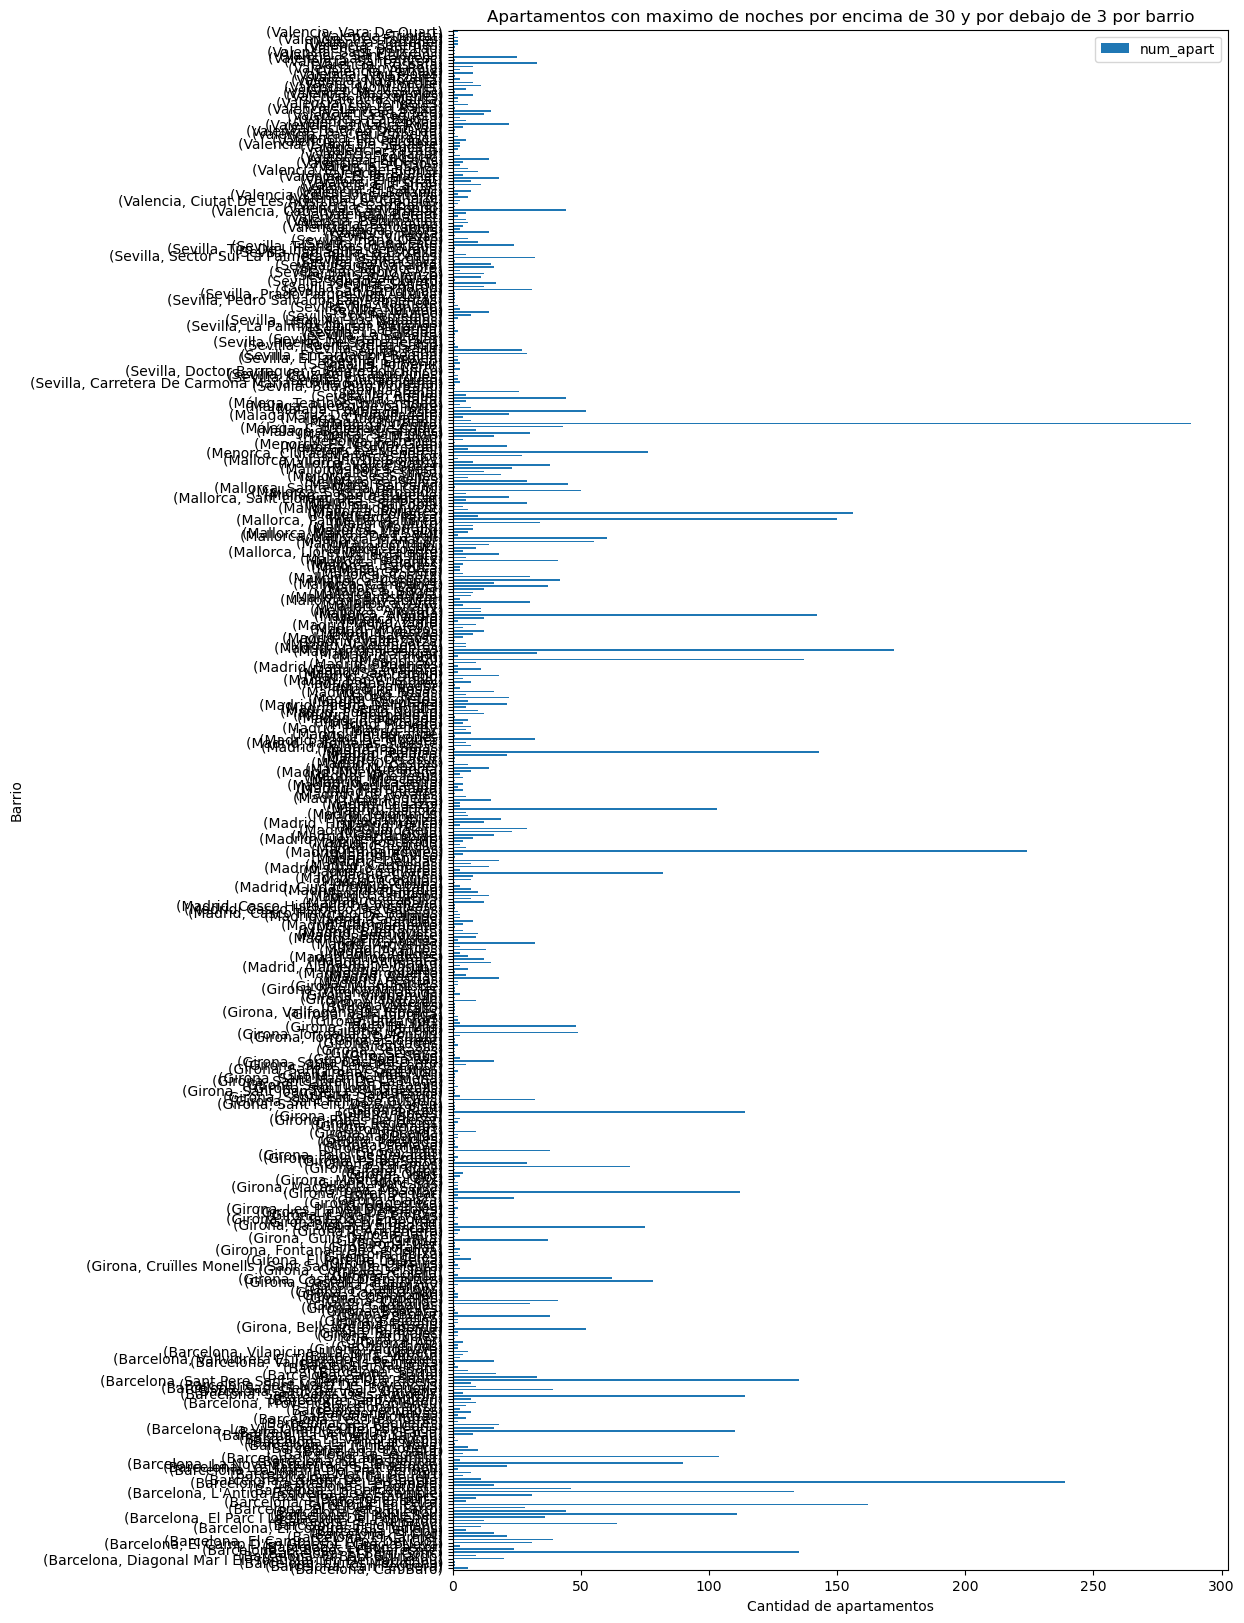

In [34]:
group_maximum_nights.plot(kind='barh', title='Apartamentos con maximo de noches por encima de 30 y por debajo de 3 por barrio',
               ylabel='Barrio', xlabel='Cantidad de apartamentos', figsize=(10, 20))

#### barrios que tienen apartamentos que no cumplen los umbrales

<Axes: title={'center': 'Apartamentos que no cumplen ningún umbral por barrio'}, xlabel='Cantidad de apartamentos', ylabel='Barrio'>

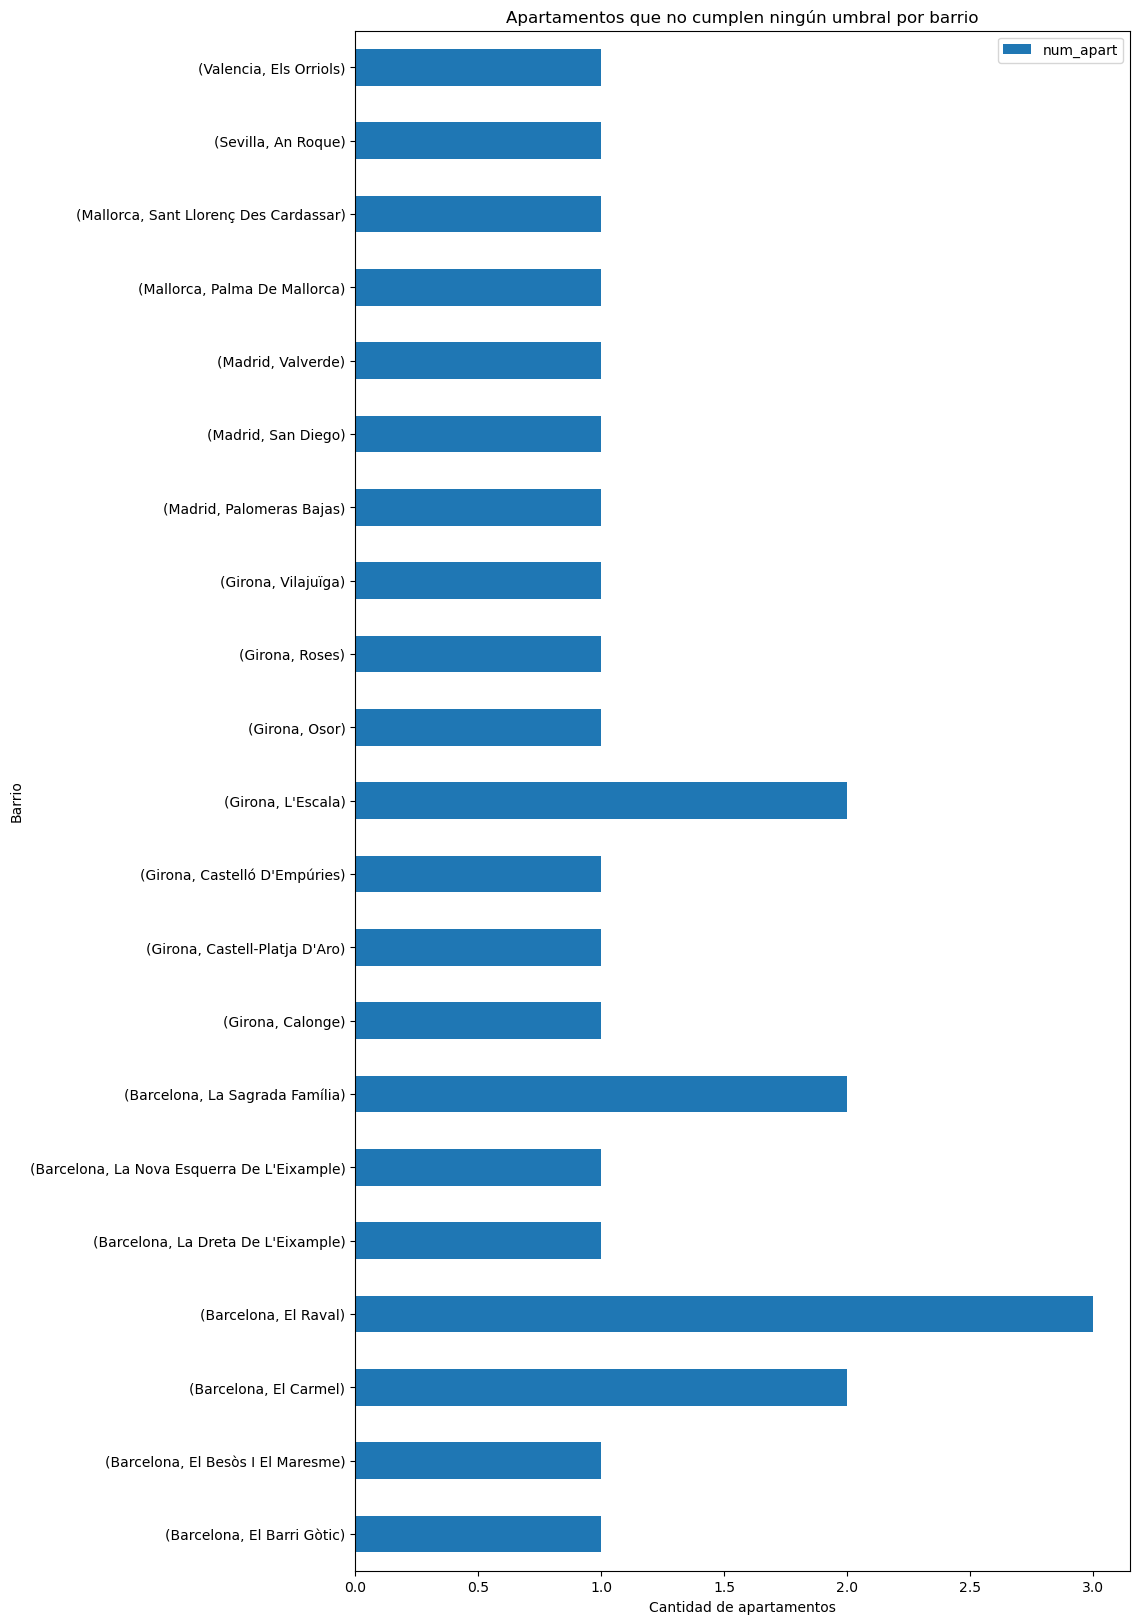

In [36]:
df.plot(kind='barh', title='Apartamentos que no cumplen ningún umbral por barrio',
               ylabel='Barrio', xlabel='Cantidad de apartamentos', figsize=(10, 20))

# Barrios con mayor potencial por ciudad y criterio

In [38]:
def analyze_rating_potential(df):
    """Analizar el potencial para alcanzar review_scores_rating >= 80"""
    results = []
    
    for city in df['city'].unique():
        city_data = df[df['city'] == city]
        
        for neighborhood in city_data['neighbourhood_name'].unique():
            nb_data = city_data[city_data['neighbourhood_name'] == neighborhood]
            
            if len(nb_data) < 3:
                continue
                
            current_above_80 = (nb_data['review_scores_rating'] >= 80).sum()
            current_pct = current_above_80 / len(nb_data)
            
            # Analiza los alojamientos por debajo de 80
            below_80 = nb_data[nb_data['review_scores_rating'] < 80]
            if len(below_80) > 0:
                avg_below = below_80['review_scores_rating'].mean()
                std_below = below_80['review_scores_rating'].std()
                fixable = len(below_80[below_80['review_scores_rating'] >= 75])  # Cerca de 80
            else:
                avg_below = std_below = 0
                fixable = 0
            
            potential_score = abs(
                current_pct * 0.4 +  # Actual
                (fixable / len(nb_data)) * 0.4 +  # Facil arreglo
                (1 - (avg_below / 80)) * 0.2 if len(below_80) > 0 else 0  # Distancia al objetivo
            )
            
            results.append({
                'city': city,
                'neighborhood': neighborhood,
                'criterion': 'Rating ≥ 80',
                'total_listings': len(nb_data),
                'current_meeting': current_above_80,
                'current_pct': current_pct,
                'below_target': len(below_80),
                'avg_below_score': avg_below,
                'fixable_listings': fixable,
                'potential_score': potential_score
            })
    
    return pd.DataFrame(results)

def analyze_min_nights_potential(df):
    """Analizar el potencial minimum_nights entre 2-3"""
    results = []
    
    for city in df['city'].unique():
        city_data = df[df['city'] == city]
        
        for neighborhood in city_data['neighbourhood_name'].unique():
            nb_data = city_data[city_data['neighbourhood_name'] == neighborhood]
            
            if len(nb_data) < 3:
                continue
                
            current_in_range = ((nb_data['minimum_nights'] >= 2) & 
                              (nb_data['minimum_nights'] <= 3)).sum()
            current_pct = current_in_range / len(nb_data)
            
            # Analiza los alojamientos fuera de rango
            out_of_range = nb_data[~((nb_data['minimum_nights'] >= 2) & 
                                   (nb_data['minimum_nights'] <= 3))]
            
            if len(out_of_range) > 0:
                # Distancia al rango
                closeness_scores = []
                for _, row in out_of_range.iterrows():
                    if row['minimum_nights'] < 2:
                        closeness = 1 - (2 - row['minimum_nights']) / 2  # Normalizar
                    else:  # > 3
                        closeness = 1 - (row['minimum_nights'] - 3) / 10  
                    closeness_scores.append(max(0, closeness))
                
                avg_closeness = np.mean(closeness_scores) if closeness_scores else 0
                fixable = len([x for x in closeness_scores if x > 0.7])  # Cercanos
            else:
                avg_closeness = 0
                fixable = 0
            
            potential_score = abs(
                current_pct * 0.3 +
                (fixable / len(nb_data)) * 0.5 +
                avg_closeness * 0.2
            )
            
            results.append({
                'city': city,
                'neighborhood': neighborhood,
                'criterion': 'Min Nights 2-3',
                'total_listings': len(nb_data),
                'current_meeting': current_in_range,
                'current_pct': current_pct,
                'below_target': len(out_of_range),
                'avg_current_min_nights': nb_data['minimum_nights'].mean(),
                'fixable_listings': fixable,
                'potential_score': potential_score
            })
    
    return pd.DataFrame(results)

def analyze_max_nights_potential(df):
    """AAnalizar el potencial maximum_nights entre 4-30"""
    results = []
    
    for city in df['city'].unique():
        city_data = df[df['city'] == city]
        
        for neighborhood in city_data['neighbourhood_name'].unique():
            nb_data = city_data[city_data['neighbourhood_name'] == neighborhood]
            
            if len(nb_data) < 3:
                continue
                
            current_in_range = ((nb_data['maximum_nights'] > 3) & 
                              (nb_data['maximum_nights'] < 30)).sum()
            current_pct = current_in_range / len(nb_data)
            
            # Analiza alojamientos fuera de rango
            out_of_range = nb_data[~((nb_data['maximum_nights'] > 3) & 
                                   (nb_data['maximum_nights'] < 30))]
            
            if len(out_of_range) > 0:
                # Distancia al rango
                closeness_scores = []
                for _, row in out_of_range.iterrows():
                    if row['maximum_nights'] <= 3:
                        closeness = (row['maximum_nights'] - 1) / 2  
                    else:  # >= 30
                        closeness = 1 - (row['maximum_nights'] - 29) / 100  
                    closeness_scores.append(max(0, min(1, closeness)))
                
                avg_closeness = np.mean(closeness_scores) if closeness_scores else 0
                fixable = len([x for x in closeness_scores if x > 0.6])
            else:
                avg_closeness = 0
                fixable = 0
            
            potential_score = abs(
                current_pct * 0.3 +
                (fixable / len(nb_data)) * 0.5 +
                avg_closeness * 0.2
            )
            
            results.append({
                'city': city,
                'neighborhood': neighborhood,
                'criterion': 'Max Nights 4-29',
                'total_listings': len(nb_data),
                'current_meeting': current_in_range,
                'current_pct': current_pct,
                'below_target': len(out_of_range),
                'avg_current_max_nights': nb_data['maximum_nights'].mean(),
                'fixable_listings': fixable,
                'potential_score': potential_score
            })
    
    return pd.DataFrame(results)

def analyze_location_potential(df):
    """Analizar el potencial para alcanzar review_scores_location >= 8"""
    results = []
    
    for city in df['city'].unique():
        city_data = df[df['city'] == city]
        
        for neighborhood in city_data['neighbourhood_name'].unique():
            nb_data = city_data[city_data['neighbourhood_name'] == neighborhood]
            
            if len(nb_data) < 3:
                continue
                
            current_above_8 = (nb_data['review_scores_location'] >= 8).sum()
            current_pct = current_above_8 / len(nb_data)
            
            # Analizar alojamientos por debajo de 8
            below_8 = nb_data[nb_data['review_scores_location'] < 8]
            if len(below_8) > 0:
                avg_below = below_8['review_scores_location'].mean()
                fixable = len(below_8[below_8['review_scores_location'] >= 7.5])  # Cercania al umbral
            else:
                avg_below = 0
                fixable = 0
            
            potential_score = abs(
                current_pct * 0.4 +
                (fixable / len(nb_data)) * 0.4 +
                (1 - (8 - avg_below) / 2) * 0.2 if len(below_8) > 0 else 0  # Distancia al umbral
            )
            
            results.append({
                'city': city,
                'neighborhood': neighborhood,
                'criterion': 'Location ≥ 8',
                'total_listings': len(nb_data),
                'current_meeting': current_above_8,
                'current_pct': current_pct,
                'below_target': len(below_8),
                'avg_below_score': avg_below,
                'fixable_listings': fixable,
                'potential_score': potential_score
            })
    
    return pd.DataFrame(results)

In [39]:
# Analisis para cada criterio
rating_analysis = analyze_rating_potential(data)
min_nights_analysis = analyze_min_nights_potential(data)
max_nights_analysis = analyze_max_nights_potential(data)
location_analysis = analyze_location_potential(data)

# Unímos los resultados
all_analyses = pd.concat([
    rating_analysis,
    min_nights_analysis, 
    max_nights_analysis,
    location_analysis
], ignore_index=True)

In [40]:
all_analyses

,city,neighborhood,criterion,total_listings,current_meeting,current_pct,below_target,avg_below_score,fixable_listings,potential_score,avg_current_min_nights,avg_current_max_nights
0,Málaga,Centro,Rating ≥ 80,324,310,0.956790,14,69.571429,3,0.412491,NaN,NaN
1,Málaga,Cruz De Humilladero,Rating ≥ 80,27,24,0.888889,3,71.666667,0,0.376389,NaN,NaN
2,Málaga,Este,Rating ≥ 80,61,59,0.967213,2,76.500000,2,0.408750,NaN,NaN
3,Málaga,Carretera De Cadiz,Rating ≥ 80,51,50,0.980392,1,60.000000,0,0.442157,NaN,NaN
4,Málaga,Palma-Palmilla,Rating ≥ 80,7,7,1.000000,0,0.000000,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1379,Menorca,Alaior,Location ≥ 8,33,33,1.000000,0,0.000000,0,0.000000,NaN,NaN
1380,Menorca,Mahón,Location ≥ 8,18,18,1.000000,0,0.000000,0,0.000000,NaN,NaN
1381,Menorca,Sant Lluís,Location ≥ 8,34,34,1.000000,0,0.000000,0,0.000000,NaN,NaN
1382,Menorca,Es Castell,Location ≥ 8,6,6,1.000000,0,0.000000,0,0.000000,NaN,NaN


In [41]:

def rank_with_zeros_last(group):
    
    has_score = group['potential_score'] > 0
    
    
    group.loc[has_score, 'rank_in_city'] = group.loc[has_score, 'potential_score'].rank(
        method='dense',
        ascending=False
    )
    
    # Asignamos a los ceros el peor rango (max rank + 1)
    if has_score.sum() > 0:  
        max_rank = group.loc[has_score, 'rank_in_city'].max()
        group.loc[~has_score, 'rank_in_city'] = max_rank + 1
    else:  
        group.loc[~has_score, 'rank_in_city'] = 1
    
    return group

#Ranking
all_analyses = all_analyses.groupby(['city', 'criterion']).apply(rank_with_zeros_last).reset_index(drop=True)


all_analyses['rank_in_city'] = all_analyses['rank_in_city'].astype(int)




In [42]:
all_analyses.to_csv("potencial_10112025.csv", index=False)

In [73]:
all_analyses

,city,neighborhood,criterion,total_listings,current_meeting,current_pct,below_target,avg_below_score,fixable_listings,potential_score,avg_current_min_nights,avg_current_max_nights,rank_in_city
0,Málaga,Centro,Rating ≥ 80,324,310,0.956790,14,69.571429,3,0.412491,NaN,NaN,2
1,Málaga,Cruz De Humilladero,Rating ≥ 80,27,24,0.888889,3,71.666667,0,0.376389,NaN,NaN,4
2,Málaga,Este,Rating ≥ 80,61,59,0.967213,2,76.500000,2,0.408750,NaN,NaN,3
3,Málaga,Carretera De Cadiz,Rating ≥ 80,51,50,0.980392,1,60.000000,0,0.442157,NaN,NaN,1
4,Málaga,Palma-Palmilla,Rating ≥ 80,7,7,1.000000,0,0.000000,0,0.000000,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,Menorca,Alaior,Location ≥ 8,33,33,1.000000,0,0.000000,0,0.000000,NaN,NaN,2
1380,Menorca,Mahón,Location ≥ 8,18,18,1.000000,0,0.000000,0,0.000000,NaN,NaN,2
1381,Menorca,Sant Lluís,Location ≥ 8,34,34,1.000000,0,0.000000,0,0.000000,NaN,NaN,2
1382,Menorca,Es Castell,Location ≥ 8,6,6,1.000000,0,0.000000,0,0.000000,NaN,NaN,2
